# Exploratory Data Analysis: Cardano Market Analysis 

Bitcoin was created in response to the 2008 Global Recession that saw many of our financial markets falter only to be propped up by governments, banks, etc. Since then, Bitcoin has exploded both in value and in brand name appeal. This surge in popularity has driven the price of a BTC to date over 35000 USD with an all-time high of nearly 65000 USD, a far cry from the days in the early 2000's where you could mine BTC at a valuation of less than a penny. 
 
Now, this notebook is not about Bitcoin and this exposé may leave you wondering, "Why are we talking about Bitcoin?" This drive in popularity that Bitcoin has experienced has paved the way for an entire financial ecosystem built on blockchain technology that is less than a decade old and challenges the current legacy banking system held by most countries. It is within this ecosystem that Ethereum was created in 2015 as a decentralized, open-source blockchain with smart contract functionality. Ethereum is currently the most actively used blockchain for the buying, selling and trading of cryptocurrencies, in their varying forms, with many competitors stepping into the ring in the past 12-24 months. 
  
Cardano utilizes a public blockchain platform that is open-source, decentralized and proof of stake that can facilitate peer-to-peer transactions with it's internal cryptocurrency, ADA (named after Ada Lovelace). Cardano was founded by Charles Hoskinson, one of the original founders of the Ethereum blockchain, and is looking to provide a quicker, cheaper alternative to the current Ethereum blockchain. 
  
A common trope within the cryptocurrency world is "As Bitcoin goes, so goes the rest of the market." It is within this perceived reality that I will explore the market trends of BTC and ETH, and thus compare them with the much more recent project Cardano. 

In [63]:
import pandas as pd #pd.read_csv, data processing 
import numpy as np #linear algebra 
import matplotlib.pyplot as plt #graphic visualization
import seaborn as sns #graphic visualization

In [64]:
ADA_df = pd.read_csv('../Capstone_Project_3/Data/ADA_df.csv')
ETH_df = pd.read_csv('../Capstone_Project_3/Data/ETH_df.csv')
BTC_df = pd.read_csv('../Capstone_Project_3/Data/BTC_df.csv')

In [65]:
#merge DataFrames and sort by date 
merged_df = pd.concat([ADA_df, ETH_df, BTC_df])
merged_df = merged_df.drop(['Unnamed: 0'], axis=1)
merged_df.sort_values(by='Date', ascending=True).head()

,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [66]:
#extract 'Close' values and pivot table to show said values per day for each cryptocurrency
df_close = merged_df[['Symbol', 'Date', 'Close']]
pivot_df = df_close.pivot(index='Date', columns='Symbol', values='Close')
pivot_df.head()

Symbol,ADA,BTC,ETH
Date,,,
2013-04-29,NaN,144.539993,NaN
2013-04-30,NaN,139.000000,NaN
2013-05-01,NaN,116.989998,NaN
2013-05-02,NaN,105.209999,NaN
2013-05-03,NaN,97.750000,NaN


In [67]:
#Assess differences between each coin 
pivot_df.describe()

Symbol,ADA,BTC,ETH
count,1245.000000,2862.000000,2031.000000
mean,0.138757,4852.092547,258.142275
std,0.177812,6975.105869,309.321155
min,0.018539,68.431000,0.434829
25%,0.044328,420.989243,12.866100
50%,0.080952,1182.809998,185.028722
75%,0.143573,7926.696939,333.370499
max,1.324860,57539.943668,1960.164744


Bitcoin has been worth the most, with it's valuation being approximately 57,500 USD, with ETH trailing behind at 1,960 USD and ADA at 1.32 USD. How do the trajectories of each coin compare over time? 

/Users/Reeves1/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Closing Price($)')

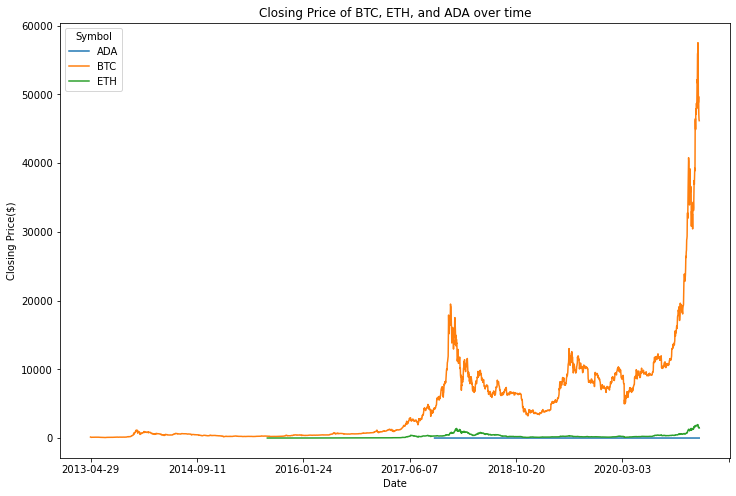

In [68]:
pivot_df.plot(figsize=(12,8))
plt.title('Closing Price of BTC, ETH, and ADA over time')
plt.ylabel('Closing Price($)')

It is quite obvious that Bitcoin has a much larger volume of USD value, and thus it is easier to see it's movement scaled on at this rate. It is worth noting that BTC is much larger than both ADA and ETH when compared by daily trading price. Updating this graphical representation to show the price change on a logarithmic scale in each currency price per day will give a more accurate representation of how these coins trend together or apart. 

/Users/Reeves1/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


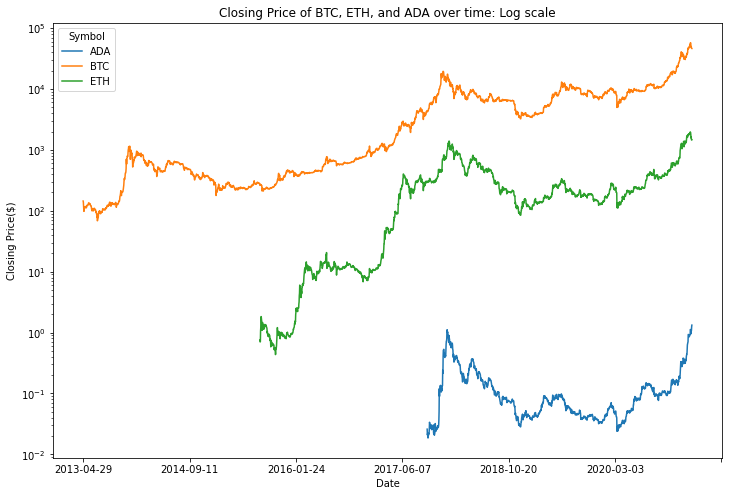

In [69]:
pivot_df.plot(figsize=(12,8))
plt.title('Closing Price of BTC, ETH, and ADA over time: Log scale')
plt.ylabel('Closing Price($)')
plt.yscale('log')

It seems that the trope is true! There is a strong similarity in trend lines for each cryptocurrency that follows Bitcoin's peaks and valleys. We see this in the peak in late 2017-early 2018 as all three coins rose up, then began a steady decline. Currently, all three coins are moving up in a bull market trend in early 2021. How do these cryptocurrencies compare by Market Cap? 

In [70]:
#Create df_MarketCap and compare cryptocurrencies trends in log scale
merged_df['Marketcap_billion'] = merged_df['Marketcap'] / 1000000000
df_MCbillion = merged_df[['Symbol', 'Date', 'Marketcap_billion']]
pivot_df1 = df_MCbillion.pivot(index='Date', columns='Symbol', values='Marketcap_billion')
pivot_df1.head()

Symbol,ADA,BTC,ETH
Date,,,
2013-04-29,NaN,1.603769,NaN
2013-04-30,NaN,1.542813,NaN
2013-05-01,NaN,1.298955,NaN
2013-05-02,NaN,1.168517,NaN
2013-05-03,NaN,1.085995,NaN


/Users/Reeves1/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


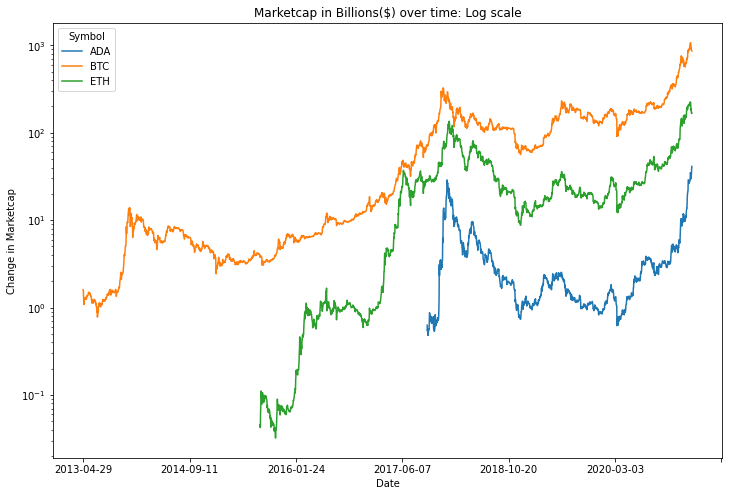

In [71]:
pivot_df1.plot(figsize=(12,8))
plt.title('Marketcap in Billions($) over time: Log scale')
plt.ylabel('Change in Marketcap')
plt.yscale('log')

As is noted in the closing price log scaled graphical representation above, the three cryptocurrencies move in congruence with each other. How do we know for sure that Bitcoin is leading the charge and not the other way around? 

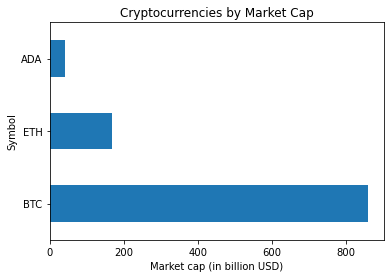

In [72]:
#Display Marketcap size in billions of dollars
ax = merged_df.groupby(['Symbol'])['Marketcap_billion'].last().sort_values(ascending=False).plot(kind='barh');
ax.set_xlabel("Market cap (in billion USD)");
plt.title("Cryptocurrencies by Market Cap");

Ethereum is the second largest cryptocurrency by Marketcap size in the entire cryptocurrency world, and it is a quarter of the size of BTC. Cardano, which has aspects of it's blockchain that have not been released to the public yet, is roughly a quarter of the size of Ethereum. Clearly, between these three coins, the sheer volume of BTC dominates the market, and as it goes so do the other currencies. Another way to visualize this is to look at the daily transaction volume to see which cryptocurrency is exchanging hands most often. 

/Users/Reeves1/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Daily Transactions ($ millions)')

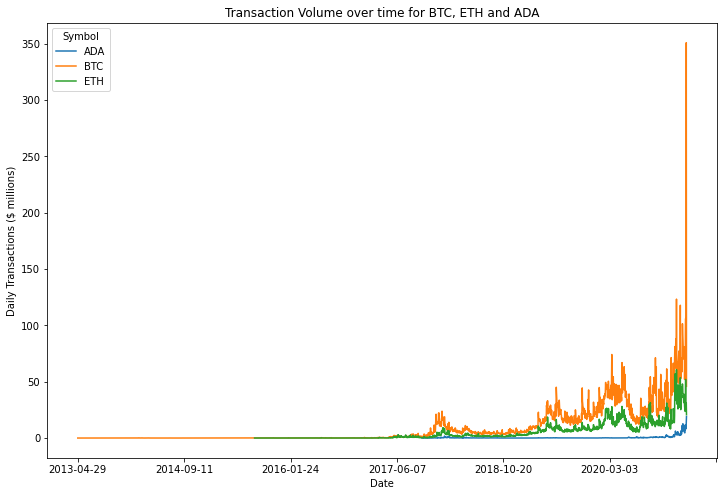

In [73]:
merged_df['volume_million'] = merged_df['Volume'] / 1000000000
df_volume = merged_df[['Symbol', 'Date', 'volume_million']]
pivot_df2 = df_volume.pivot(index='Date', columns='Symbol', values='volume_million')
pivot_df2.plot(figsize=(12,8))
plt.title('Transaction Volume over time for BTC, ETH and ADA')
plt.ylabel('Daily Transactions ($ millions)')

To recap, Bitcoin leads the way in daily transaction volume, Marketcap size, and seems to dictate which way the market moves at any given point, as the other cryptocurrencies follow. As the market currently stands, it is important to keep any insights gathered in the forecasting of ADA in the future within the context of Bitcoin dictating the market. Simply put, for ADA to do well, BTC needs to be doing well. With that, let's look further into Cardano. 

In [74]:
#remove Unnamed: 0 column
ADA_df = ADA_df.drop(['Unnamed: 0'], axis=1)
ADA_df.head()

,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,ADA,2017-10-02,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08
1,ADA,2017-10-03,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08
2,ADA,2017-10-04,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08
3,ADA,2017-10-05,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08
4,ADA,2017-10-06,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08


In [75]:
#Create versions of the Volume and Marketcap columns
ADA_df['Market_billion'] = ADA_df['Marketcap'] / 1000000000
ADA_df['Volume_million'] = ADA_df['Volume'] / 1000000000

In [78]:
ADA_df.head()

,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Market_billion,Volume_million
0,ADA,2017-10-02,0.030088,0.019969,0.024607,0.025932,57641300.0,6.288991e+08,0.628899,0.057641
1,ADA,2017-10-03,0.027425,0.020690,0.025757,0.020816,16997800.0,5.396927e+08,0.539693,0.016998
2,ADA,2017-10-04,0.022806,0.020864,0.020864,0.021931,9000050.0,5.686195e+08,0.568620,0.009000
3,ADA,2017-10-05,0.022154,0.020859,0.021951,0.021489,5562510.0,5.571390e+08,0.557139,0.005563
4,ADA,2017-10-06,0.021542,0.018360,0.021359,0.018539,7780710.0,4.806646e+08,0.480665,0.007781


/Users/Reeves1/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


Text(0, 0.5, 'Marketcap ($ billions)')

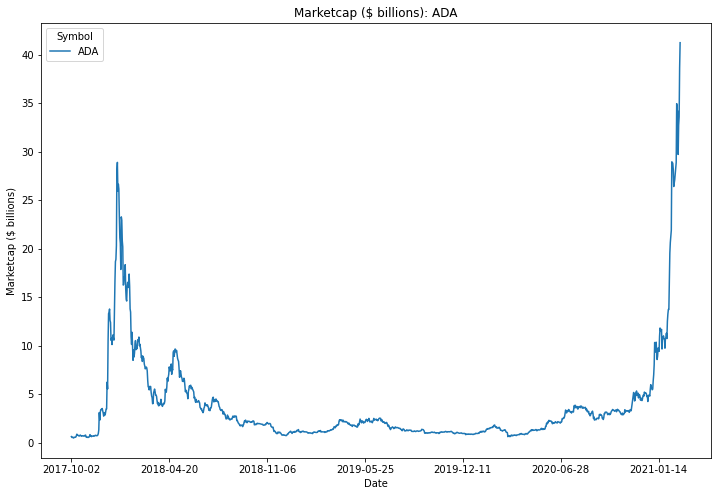

In [79]:
#Display the change in Marketcap over time for ADA
ax1 = ADA_df.groupby(['Date', 'Symbol'])['Market_billion'].mean().unstack().plot(figsize=(12,8));
ax.set_ylabel("Market Cap (in billion USD)");
plt.title("Marketcap ($ billions): ADA");
plt.ylabel('Marketcap ($ billions)')

In [148]:
#find the Marketcap value at the first peak and calculate the percentage growth in that period of time. 
ADA_df['Date'] = ADA_df['Date'].astype('datetime64')
ADA_min_mc = ADA_df.loc[ADA_df['Market_billion'].idxmin()]
ADA_max_date = ADA_df.loc[ADA_df['Date'].dt.year < 2019]
ADA_max_mc = ADA_max_date['Market_billion'].max()
pct_growth = (ADA_max_mc/ADA_min_mc['Market_billion'])*100
print('ADA had a Marketcap of $', round(ADA_min_mc['Market_billion'], 2), 'billion on ', ADA_min_mc['Date'], 'and grew to $', round(ADA_max_mc, 2), 'billion on ', ADA_max_date.loc[ADA_max_date['Market_billion'].idxmax()]['Date'],"\n", 'which is ', round(pct_growth,2),'% growth.')

ADA had a Marketcap of $ 0.48 billion on  2017-10-06 00:00:00 and grew to $ 28.89 billion on  2018-01-04 00:00:00 
 which is  6009.57 % growth.


Cardano saw a relatively quick burst in Marketcap value within a few months of it being debuted in late 2017. It grew by over 6000% in less than two months, before beginning a stark decline to prices similar to what it debuted at. Currently, ADA's Marketcap is at an all-time high and trending upward. What is the change in price of Cardano over this time period? 

Text(0, 0.5, 'Closing price ($)')

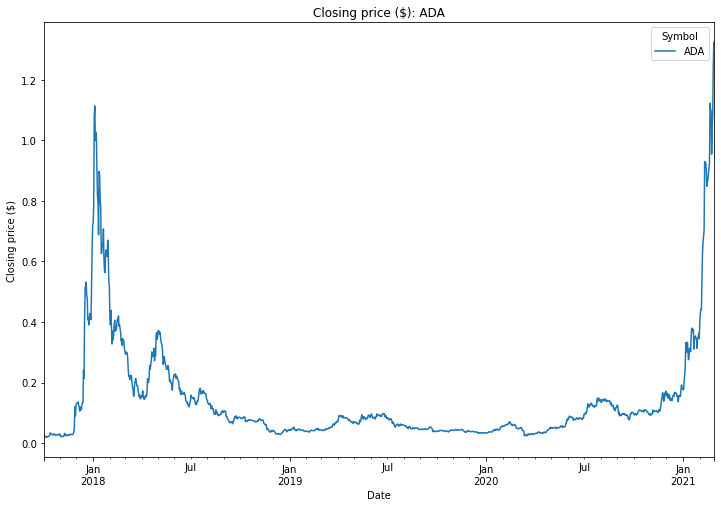

In [149]:
#Display the change in Price over time for ADA
ax1 = ADA_df.groupby(['Date', 'Symbol'])['Close'].mean().unstack().plot(figsize=(12,8));
plt.title("Closing price ($): ADA");
plt.ylabel('Closing price ($)')

In [151]:
ADA_min_close = ADA_df.loc[ADA_df['Close'].idxmin()]
ADA_max_close = ADA_max_date['Close'].max()
pct_growth2 = ADA_max_mc/ADA_min_mc['Close']
print('ADA had a Closing Price of $', round(ADA_min_close['Close'], 2), 'on ', ADA_min_close['Date'], 'and grew to $', round(ADA_max_close, 2), 'on ', ADA_max_date.loc[ADA_max_date['Close'].idxmax()]['Date'],"\n", 'which is ', round(pct_growth2,2),'% growth.')

ADA had a Closing Price of $ 0.02 on  2017-10-06 00:00:00 and grew to $ 1.11 on  2018-01-04 00:00:00 
 which is  1558.11 % growth.


As we can see, the change in closing price mirrored the growth in Marketcap, though not to the same degree of change, with that percent growth of Closing price being nearly a fourth the percent growth of ADA's Marketcap. With the current peak following a similar trend to the first, can investors expect a similar drop off as there was the first time? What reason could there be to expect a different outcome? 

Text(0, 0.5, 'Trading Volume (millions)')

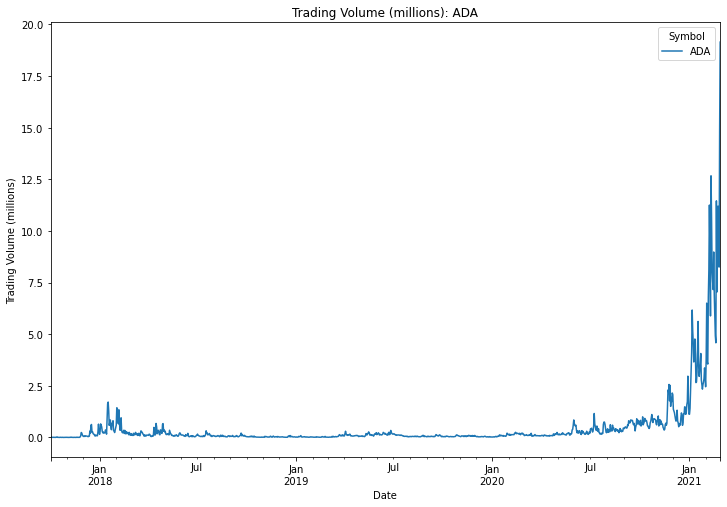

In [152]:
#Display the change in trading volume over time for ADA
ax1 = ADA_df.groupby(['Date', 'Symbol'])['Volume_million'].mean().unstack().plot(figsize=(12,8));
plt.title("Trading Volume (millions): ADA");
plt.ylabel('Trading Volume (millions)')

Interestingly, the peak in early 2018 didn't see nearly the amount of ADA exchanging hands as there is now. Cardano has achieved a more robust level of adoption, which could mean an increase in price, as well as a continued upward trajectory OR a lower floor, should BTC move back down (remembering that as BTC moves, so does the rest of the market). Before beginning the arranging of the baseline model, it would be interesting to note correlations between variables within ADA. 

<AxesSubplot:>

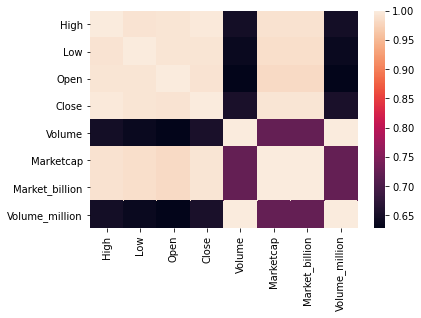

In [158]:
corr_df = ADA_df.drop(['Symbol'], axis=1)
corr = corr_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

There seems to be a high level of correlation between many of the variable (especially High, Low, Open, Close, Marketcap and Market_billion). Obviously, it would be best to choose between Marketcap and Market_billion as well as Volume and Volume_million. Preparing the dataframe for the baseline model in timeseries forecasting will happen during the next Pre-Processing notebook, as the dataframe is now clean and insig